In [20]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model  
import numpy as np
import pandas as pd
from tqdm import tqdm
import timeit

# Training Model
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt 


In [2]:
def conver_image_to_features(model, img_path, img_resize = (224, 224)):
    img = image.load_img(img_path, target_size=img_resize)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features = model.predict(x)
    return features.reshape(-1) 

def image2feature(model, train_csv):
    df = pd.read_csv(train_csv)
    
    image_features = []

    for ind, row in tqdm(df.iterrows(), total=df.shape[0], desc="image2feature"):
        try:
            image_features.append(
                (conver_image_to_features(model, row["img1"]),
                 conver_image_to_features(model, row["img2"]),
                 row["same"]))
        except:
            print("error image {} or ".format(row["img1"], row["img2"]))
        
    res = pd.DataFrame({
        "x1" : [x[0] for x in image_features],
        "x2" : [x[1] for x in image_features],
        "y" : [x[2] for x in image_features],
    })
    
    return res


def gen_input_data(model, index_csv):
    df = image2feature(model, index_csv)
    X = pd.DataFrame.from_records(df.x1 - df.x2)
    y = df["y"]
    
    return df, X, y

In [22]:
def run_random_forest_precedure(train_csv, test_csv):

    start = timeit.default_timer()
    
    # Extract feature model
    feature_model = VGG16(weights="imagenet", include_top=False)
    
    train_df, train_X, train_y = gen_input_data(feature_model, train_csv)
    test_df, test_X, test_y = gen_input_data(feature_model, test_csv)

    clf = RandomForestClassifier(max_depth=2, random_state=0)
    clf.fit(train_X, train_y)

    y_pred_train=clf.predict(train_X)
    print("Training Accuracy:",metrics.accuracy_score(train_y, y_pred_train))

    y_pred_test=clf.predict(test_X)
    # Model Accuracy, how often is the classifier correct?
    print("Test Accuracy:",metrics.accuracy_score(test_y, y_pred_test))

    classifiers = [(train_X, train_y, "train"), (test_X, test_y, "test")]
    ax = plt.gca()
    for X, y, name in classifiers:
        metrics.plot_roc_curve(clf, X, y, name=name, ax=ax)  
        
    #Your statements here
    stop = timeit.default_timer()
    print('Duration: ', stop - start) 


image2feature: 100%|██████████| 200/200 [00:52<00:00,  3.83it/s]


Training Accuracy: 1.0
Test Accuracy: 0.475


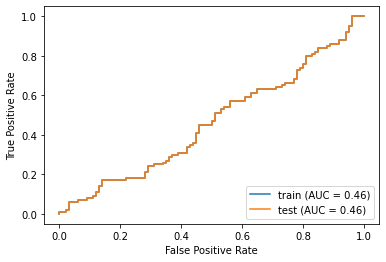

In [17]:
# mini
run_random_forest_precedure("./min_index.csv", "./test_200.csv")

image2feature:  52%|█████▏    | 261/500 [01:09<01:01,  3.91it/s]

error image ../../data/train_1/10509.jpg or 


image2feature: 100%|██████████| 200/200 [00:51<00:00,  3.85it/s]


Training Accuracy: 0.9278557114228457
Test Accuracy: 0.61
Duration:  191.5303742


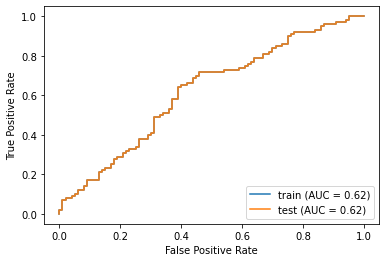

In [23]:
# 500
run_random_forest_precedure("./train_500.csv", "./test_200.csv")

image2feature:   5%|▌         | 101/2000 [00:26<08:30,  3.72it/s]

error image ../../data/train_1/10509.jpg or 


image2feature:  22%|██▏       | 437/2000 [01:59<07:00,  3.71it/s]C:\Users\DELL\.conda\envs\tf2_bert\lib\site-packages\PIL\Image.py:2837: DecompressionBombWarning: Image size (131790400 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,
image2feature:  66%|██████▋   | 1326/2000 [06:09<03:21,  3.35it/s]C:\Users\DELL\.conda\envs\tf2_bert\lib\site-packages\PIL\Image.py:2837: DecompressionBombWarning: Image size (129097476 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,
image2feature:  99%|█████████▉| 1988/2000 [09:20<00:02,  4.22it/s]

error image ../../data/train_3/3917.jpg or 


image2feature: 100%|██████████| 200/200 [00:55<00:00,  3.60it/s]


Training Accuracy: 0.8173173173173173
Test Accuracy: 0.56
Duration:  639.6561017


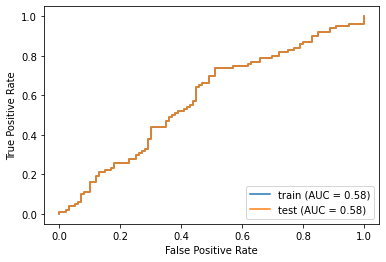

In [24]:
# 2000
run_random_forest_precedure("./train_2000.csv", "./test_200.csv")

In [ ]:
# 5000
run_random_forest_precedure("./train_5000.csv", "./test_500.csv")

In [ ]:
# 10000
run_random_forest_precedure("./train_10000.csv", "./test_500.csv")

In [ ]:
# 20000
run_random_forest_precedure("./train_20000.csv", "./test_500.csv")

In [ ]:
# 50000
run_random_forest_precedure("./train_50000.csv", "./test_500.csv")